In [7]:
import pandas as pd

# Load the dataset into a Pandas DataFrame with a different encoding
df= pd.read_csv("C:\\Users\\Genius\\Pictures\\Camera Roll\\Text Analytics on a Resume\\Resume_data.csv", encoding='latin1')

# Display the first few rows of the DataFrame
print(df.head())




       Category                                             Resume
0           NaN  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...


In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords.words('english')]
    text = " ".join(text)
    text = WordNetLemmatizer().lemmatize(text)
    return text

df['cleaned_text'] = df['Resume'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Genius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Genius\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Genius\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenizing the cleaned text
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Genius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenizing the cleaned text
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Genius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
from nltk.probability import FreqDist

# Creating a single list of all words in the dataset
all_words = [word for tokenized_text in df['tokenized_text'] for word in tokenized_text]

# Calculating the frequency distribution of words
fdist = FreqDist(all_words)
print(fdist.most_common(10))  # Adjust number to see more common words


[('â¢', 4880), ('exprience', 3829), ('details', 3031), ('project', 2629), ('data', 1934), ('company', 1820), ('management', 1660), ('team', 1478), ('maharashtra', 1431), ('year', 1281)]


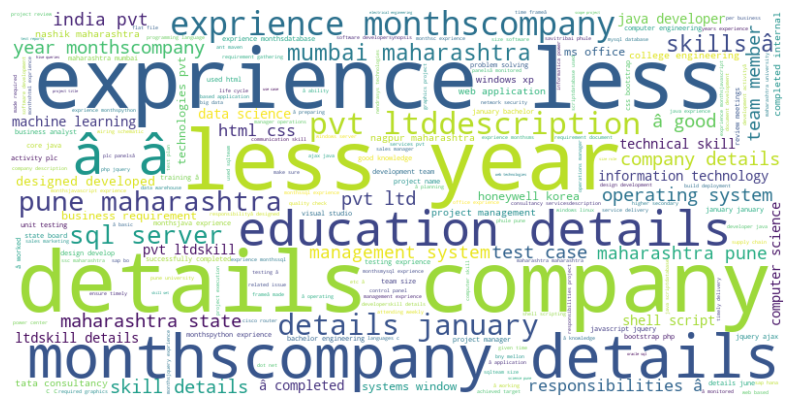

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Joining all the cleaned texts into a single string
all_text = ' '.join(df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
# Assuming 'Category' is the column with job categories and you're interested in 'Data Science'
data_science_df = df[df['Category'] == 'Data Science']


In [14]:
data_science_corpus = ' '.join(data_science_df['cleaned_text'])


In [15]:
data_science_skills = ['python', 'r', 'sql', 'tensorflow', 'pytorch', 'machine learning', 'deep learning']

skill_frequency = {skill: data_science_corpus.count(skill) for skill in data_science_skills}

print(skill_frequency)


{'python': 170, 'r': 5257, 'sql': 99, 'tensorflow': 16, 'pytorch': 0, 'machine learning': 135, 'deep learning': 51}
